## Создание архитектуры нейронной сети посредством модуля torch.nn

Нейронные сети состоят из слоев, которые производят преобразования над данными. В PyTorch принято называть слои ***модулями*** (modules), и далее мы тоже будем использовать это название.

Для большей чёткости в структуре нейронной сети используются классы. В PyTorch есть отдельный класс [torch.nn](https://pytorch.org/docs/stable/nn.html), специально созданный для работы с нейронными сетями. В нём уже реализованы все типы слоёв и функций активации. Это позволяет существенно сократить код и упростить работу с нейронными сетями.

Пространство имен [`torch.nn`](https://pytorch.org/docs/stable/nn.html) предоставляет "строительные блоки", которые нужны для создания своей собственной нейронной сети. Каждый *модуль* в PyTorch является дочерним классом от [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Таким образом, нейронная сеть сама по себе будет являться *модулем*, состоящим из других *модулей* (слоев). Такая вложенная структура позволяет легко создавать сложные архитектуры и управлять ими.

Сначала импортируем модуль (from torch import nn) и потом обращаемся к нему:
функция активации ReLU --- nn.ReLU();
функция активации sigmoid --- nn.Sigmoid();
линейный слой --- nn.Linear();
свёрточный слой --- nn.Conv2d() и т.д.

Рассмотрим основные "строительные блоки", при помощи которых мы будем создавать нейронные сети.

# Подмодуль torch.nn.Module --- описание класса модели

Мы определяем нейронную сеть, наследуясь от класса `nn.Module`, и инициализируем ее слои в методе `__init__`. Каждый класс-наследник `nn.Module` производит операции над входными данными в методе `forward`.

Множество слоев в нейронных сетях имеют *обучаемые параметры*, т. е. имеют ассоциированные с ними веса и смещения, которые оптимизируются во время обучения.

Наследование от `nn.Module` автоматически отслеживает все слои, определенные внутри вашего класса модели, и делает все их параметры доступными с помощью методов `model.parameters()` или `model.named_parameters()`.

Создадим на базе класса `nn.Module` свой собственный класс, который будет его наследником. В качестве объекта возьмём нейронную сеть из предыдущего раздела:

<img src='assets/multilayer_diagram_weights.png' width="1000">

Эта простая нейронная сеть состоит из двух линейных слоёв: первый размером $3 \times 2$ с последующим применением функции активации ReLU, второй размером $2 \times 1$. Обращаю внимание на метод forward() --- именно он отвечает за "проход по нейронной сети". Строгое определение: процесс передачи значений от входных нейронов к выходным называется прямым распространением (forward pass).

Сначала подключим необходимые библиотеки:

In [1]:
import torch
from torch import nn

Потом создадим класс через наследование от класса `nn.Module`:

In [2]:
import torch
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(3, 2)
        self.output = nn.Linear(2, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        # функция прохода входного изображения сквозь нейронную сеть.
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)

        return x

Чтобы использовать модель, необходимо передать ей входные данные. Это приводит в действие метод `forward`, а также определенные фоновые операции. Не следует вызывать `model.forward` напрямую!

Создадим случайный входной вектор размерности $1 \times 3$.

In [3]:
input = torch.randn(1,3)
input

tensor([[-0.2897, -0.5167,  1.3618]])

Чтобы начать работу с построенной нейронной сетью, необходимо сначала создать экземпляр описанного класса Network().

In [4]:
model = Network()

При обращении к этому классу получим описание структуры созданной нейронной сети.

In [5]:
model

Network(
  (hidden): Linear(in_features=3, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (activation): ReLU()
)

Теперь "пропустим" через полученную нейронную сеть созданный нами входной вектор input, выведем на экран полученный результат и его размерность:

In [6]:
result = model(input)
print(result)
print(result.shape)

tensor([[-0.1757]], grad_fn=<AddmmBackward0>)
torch.Size([1, 1])


Поскольку выходное множество состоит из одного элемента, извлечём его явное значение:

In [7]:
result.item()

-0.17567649483680725

# Подмодули для функций активации

<img src ="https://edunet.kea.su/repo/EduNet-content/L05/out/neurons_output.png" width="1000">

Функции активации должны обладать следующими свойствами:

* **Нелинейность:** функция активации необходима для введения нелинейности в нейронные сети. Если функция активации не применяется, выходной сигнал становится простой линейной функцией. Нейронная сеть без нелинейностей будет действовать как линейная модель с ограниченной способностью к обучению:
$$\hat{y}=NN(X,W_1,...,W_n)=X\cdot W_1\cdot ...\cdot W_n=X\cdot W$$
Только нелинейные функции активации позволяют нейронным сетям решать задачи аппроксимации нелинейных функций:
$$\hat{y}=NN(X,W_1,...,W_n)=\sigma(...\sigma(X\cdot W_1)...\cdot W_n)\neq X\cdot W$$

* **Дифференцируемость:** функции активации должны быть способными пропускать градиент, чтобы было возможно оптимизировать параметры сети градиентными методами, в частности использовать алгоритм обратного распространения ошибки.


Любая функция активации задаётся просто своим названием: nn.ReLU, nn.Tanh, nn.Sigmoid.

## Подмодуль для линейного слоя nn.Linear

Линейный слой [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) — это модуль, который производит линейное преобразование входных данных с помощью хранящихся в нем весов и смещений.

Обязательными параметрами при объявлении этого слоя являются `in_features` — количество входных признаков, и `out_features` — количество выходных признаков.

Фактически, этот модуль добавляет в модель один полносвязный слой нейронов *без активаций*. Слой состоит из `out_features` нейронов, каждый из которых имеет `in_features` входов.

## Подмодуль для объединения слоёв в одну последовательность nn.Sequential

[`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) — это упорядоченный контейнер для модулей. Данные проходят через все модули в том же порядке, в котором они определены в `nn.Sequential`. Можно использовать такой контейнер для того, чтобы быстро собрать простую нейронную сеть, что мы и сделаем.

## Подмодуль nn.Flatten

Мы используем слой nn.Flatten для преобразования каждого изображения 1×28×28 пикселей в непрерывный массив из 784 значений (размер батча (на позиции dim=0) сохраняется).

## Подмодуль для результирующего слоя nn.Softmax

Последний линейный слой нейронной сети возвращает *логиты* — "сырые" значения из диапазона $[-∞; +∞]$, которые могут быть пропущены через модуль [`nn.Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html). Пропущенные через $\text{sofmax}$ величины могут восприниматься как вероятности, с которыми модель относит данный объект к тому или иному классу. Параметр `dim` определяет размерность, вдоль которой величины должны суммироваться к $1$.

## Пример применения всех описанных подмодулей

Для иллюстрации возьмем мини-батч (в данном случае представленный тензором, заполненным случайными числами) из трех одноканальных изображений $28 \times 28$ и посмотрим, что с ним происходит, когда мы пропускаем его через сеть.
Обращаю внимание, что изображения хранятся в разных форматах, здесь будем использовать размерность (batch_size, channels, height, width).
Итак, создаём тензор указанной размерности и выводим его размер.

In [8]:
sample_batch = torch.randn((3, 1, 28, 28))
print(f"Input size: {sample_batch.shape}")

Input size: torch.Size([3, 1, 28, 28])


Вытянем наши тестовые изображения в один вектор и выведем его размер.

In [9]:
flatten = nn.Flatten()
flat_image = flatten(sample_batch)
print(f"Size after Flatten: {flat_image.shape}")

Size after Flatten: torch.Size([3, 784])


Далее объявим линейный слой из 512 нейронов, каждый из которых получает "вытянутое" изображение из 784 пикселей. Пропустим через него это изображение и выведем на экран его размерность.

In [10]:
layer1 = nn.Linear(784, 512)
hidden1 = layer1(flat_image[0])
print(f"Size after Linear:  {hidden1.shape}")

Size after Linear:  torch.Size([512])


Линейный слой, в отличие от слоя `nn.Flatten`, имеет обучаемые параметры — веса и смещения. Они хранятся как объекты специального класса `torch.nn.parameter.Parameter` и содержат в себе тензоры собственно с величинами параметров. Получить доступ к ним можно, обратившись к атрибутам слоя `.weight` и `.bias` соответственно.

In [11]:
print(f"Size of linear layer weights: {layer1.weight.size()}")
print(f"Type of linear layer weights: {type(layer1.weight)}")

print(f"\nSize of linear layer biases: {layer1.bias.size()}")
print(f"Type of linear layer biases: {type(layer1.bias)}")

Size of linear layer weights: torch.Size([512, 784])
Type of linear layer weights: <class 'torch.nn.parameter.Parameter'>

Size of linear layer biases: torch.Size([512])
Type of linear layer biases: <class 'torch.nn.parameter.Parameter'>


Теперь применим функцию ReLU к выходному значению линейного слоя:

In [12]:
activations1 = nn.ReLU()(hidden1)

print(f"Before ReLU:  {hidden1}")
print(f"After ReLU:  {activations1}")
print(f"\n Size after ReLU:  {activations1.size()}")

Before ReLU:  tensor([-1.9980e-01,  7.6566e-01, -1.0635e-01, -4.1678e-01,  7.2631e-01,
         2.6757e-02, -5.4800e-01,  1.1524e+00,  5.6479e-01,  1.9652e-01,
        -3.3346e-01,  8.9931e-01,  1.5675e-01,  1.2656e+00, -4.5050e-01,
        -7.1997e-01,  6.5317e-01, -3.4389e-01,  9.3171e-01,  1.1905e+00,
        -4.4734e-01,  7.9940e-01,  5.1520e-01, -1.1887e+00, -4.8255e-01,
        -7.2018e-01, -1.2032e-01, -1.4198e+00,  2.3463e-01, -5.9387e-01,
         5.0602e-01, -4.9767e-01, -1.8463e-01, -4.0839e-01,  1.9319e-01,
         2.5465e-02,  4.5475e-01, -1.3996e+00, -8.3148e-01, -4.3841e-01,
         3.9361e-01,  5.0066e-01,  4.8581e-01,  8.7965e-02,  9.2717e-01,
         5.8863e-01, -9.8772e-01, -6.1488e-02,  2.0098e-01, -4.5747e-02,
         3.5014e-01,  1.1256e-01, -5.7770e-01, -4.8634e-01,  3.8717e-02,
        -5.3726e-02, -2.6363e-01, -1.4915e-01,  3.6082e-01,  9.1213e-01,
        -3.2188e-01,  2.8478e-01, -6.9559e-01, -6.3372e-01,  2.6574e-01,
         4.8366e-01, -2.0532e-01,  8.

Все описанные выше слои можно задать одной последовательностью при помощи подмодуля nn.Sequential:

In [13]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(512, 10))

sample_batch = torch.rand(3, 1, 28, 28)
logits = seq_modules(sample_batch)

print(f"Output size: {logits.size()}")

Output size: torch.Size([3, 10])


И в завершение применим функцию nn.Softmax для предсказания вероятностей выходных классов:

In [14]:
softmax = nn.Softmax(dim=1)

pred_probab = softmax(logits)

print(f"Size after Softmax: {pred_probab.size()}")

Size after Softmax: torch.Size([3, 10])


В примере ниже мы проходимся по всем параметрам модели, и для каждого тензора параметров выводим его размер.

In [15]:
print(f"Model structure: {model}\n")

for name, param in model.named_parameters():
    print(f"Layer: {name:25}  Size: {param.size()}")

Model structure: Network(
  (hidden): Linear(in_features=3, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (activation): ReLU()
)

Layer: hidden.weight              Size: torch.Size([2, 3])
Layer: hidden.bias                Size: torch.Size([2])
Layer: output.weight              Size: torch.Size([1, 2])
Layer: output.bias                Size: torch.Size([1])


## Задание: написать архитектуру нейронной сети, на вход которой подаётся изображение размера $28 \times 28$ с одним скрытым линейным слоем, состоящим из 256 нейронов с функцией активации Sigmoid и выходным слоем, состоящим из 10 нейронов. К выходному слою применить функцию Softmax.

In [16]:
import torch
from torch import nn

input = torch.randn((1, 784))

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

net = Network()
net.forward(input)

tensor([[0.0797, 0.1139, 0.2051, 0.0612, 0.0907, 0.0965, 0.0588, 0.0750, 0.1087,
         0.1104]], grad_fn=<SoftmaxBackward0>)

### Выбор устройства (device) для обучения

Мы бы хотели иметь возможность обучать модель на аппаратном ускорителе, таком как GPU, если он доступен. Проверим, доступен ли нам ускоритель [`torch.cuda`](https://pytorch.org/docs/stable/notes/cuda.html), иначе продолжим вычисления на CPU.

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Задание: создать нейронную сеть, указанную на картинке:

<img src="assets/mlp_mnist.png" width='1000'>

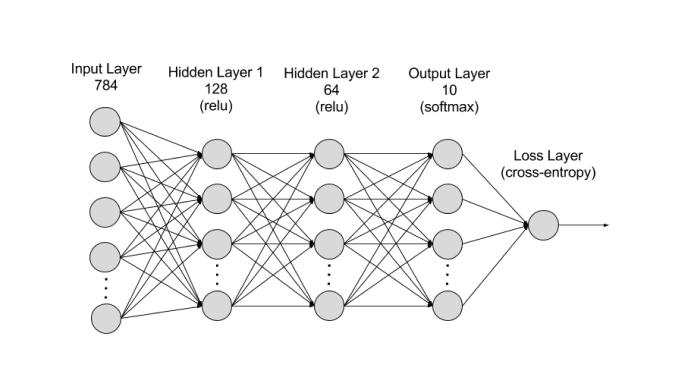

In [23]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim = 1)


    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.softmax(self.output(x))

        return x

model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

Теперь запишите эту же нейронную сеть с использованием модуля [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

In [24]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model1 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model1)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


Для создания нейронной сети можно также пользоваться модулем [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict):

In [25]:
from collections import OrderedDict
model2 = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2',  nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output',  nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax',  nn.Softmax(dim=1))]))
model2

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Чтобы явно увидеть веса модели model2, надо использовать метод parameters():

In [28]:
list(model2.parameters())

[Parameter containing:
 tensor([[ 1.6115e-02, -1.2697e-02, -3.4144e-02,  ...,  2.2876e-02,
          -2.1844e-02,  6.8676e-04],
         [ 1.3451e-02,  1.2455e-02,  2.3727e-02,  ..., -2.1310e-02,
           3.5005e-03,  1.8588e-05],
         [ 1.0371e-02, -2.7219e-02,  1.2498e-02,  ..., -2.1901e-02,
           2.9982e-02,  7.2214e-03],
         ...,
         [ 1.4737e-02,  1.5610e-03,  1.8556e-02,  ..., -3.1593e-02,
           2.3435e-02,  2.6927e-02],
         [ 3.9913e-03, -5.7543e-03,  3.4704e-02,  ..., -9.5410e-03,
           1.4516e-02, -2.2996e-03],
         [-2.6007e-02,  1.3535e-02, -3.1348e-02,  ..., -6.8469e-03,
          -9.3383e-03,  3.4695e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0107, -0.0350,  0.0341, -0.0110,  0.0056, -0.0322,  0.0203,  0.0235,
          0.0292, -0.0123,  0.0320, -0.0321, -0.0114, -0.0053,  0.0210,  0.0259,
         -0.0312, -0.0315, -0.0029,  0.0002, -0.0064, -0.0257,  0.0016, -0.0169,
         -0.0084,  0.0122, -0.0246, -0.0294, 